In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies

In [ ]:
def fitness_function(population, task_durations, task_priorities, robot_efficiencies):
    fitness =[]
    total_robot = len(robot_efficiencies)

    for i in range(len(population)):
        present_population = population[i] # taking each Individual
        Tr = np.zeros(total_robot, dtype=int) # The array represents the total time taken by a robot to complete its assigned tasks, where Tr represents the total production time.


        for j in range(len(present_population)):
            task = j  # taking each number of each Individual
            robot = present_population[task]
            td = task_durations[task]
            tp = task_priorities[task]
            re = robot_efficiencies[robot]
            Tr[robot] = Tr[robot] + ((td * tp) / re)
        Ttotal = np.max(Tr)

        # Workload Balance (B)
        B = np.std(Tr)

        # fitness.append((Ttotal + B))
        fitness.append(1/(Ttotal + B))  #inverse

    return fitness

In [ ]:
def select_parents(population, fitness):

    select = np.random.randint(1, int(len(population)/2))  # 1 to top half population

    parents = []

    for _ in range(select):
        max_fitness_idx = np.argmax(fitness)  # index of the maximum value in the fitness list.
        parents.append(population[max_fitness_idx])
        fitness[max_fitness_idx] = -np.inf  #  ensures that the selected individual will not be chosen as a parent so this individual is not selected again

    return parents
def crossover(p, num_child):    # num_child = population_size / 2
    # Single point crossover

    child = []
    for _ in range(num_child):

        crossover_point = np.random.randint(1, len(p[0]))

        p1 = np.random.randint(0, len(p))
        p2 = np.random.randint(0, len(p))

        c1 = p[p1][0:crossover_point]
        c2 = p[p2][crossover_point:]

        c3 = p[p2][0:crossover_point]
        c4 = p[p1][crossover_point:]

        child.append(np.concatenate((c1, c2)))
        child.append(np.concatenate((c3, c4)))

    return child

In [ ]:
#changes a single gene in each child randomly.

def mutation(child, mutation_rate):

    for idx in range(len(child)):
        for _ in range(int(len(child[idx])*mutation_rate)):
            T1 = np.random.randint(0, len(child[idx]))
            T2 = np.random.randint(0, len(child[idx]))
            flag = child[idx][T1]
            child[idx][T1]= child[idx][T2]
            child[idx][T2]= flag

    return child

In [ ]:
# GA algorithm placeholder for students to implement their solution
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 50  #indicating the number of individuals (solutions) in each generation.
    generation = 500
    mutation_rate = 0.1

    # Placeholder for the initial population generation

    population = []

    for _ in range(population_size):
        individual = np.random.randint(0, len(robot_efficiencies), size=len(task_durations))
        population.append(individual)

    for _ in range(generation):
        # Placeholder for the fitness function calculation
        fitness = fitness_function(population, task_durations, task_priorities, robot_efficiencies)

        # Placeholder for the selection process
        parents = select_parents(population, fitness)

        # Placeholder for the crossover operation
        select = np.random.randint(1, int(len(population)/2))
        child = crossover(parents, int(population_size / 2 ))
        # # Placeholder for the mutation operation

        # Create the new population by combining parents and child
        # population = parents + child

        population = mutation(child, mutation_rate)
    # Example of a random solution for demonstration purposes

    fitness = fitness_function(population, task_durations, task_priorities, robot_efficiencies)

    best_solution = population[np.argmax(fitness)]

    return best_solution


In [ ]:
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))  #size of the figure in inches.
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "green"])  # Custom colormap
    #white for low values (no task assigned) and blue for high values (task assigned).

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(task_durations)):
        for j in range(len(robot_efficiencies)):

            # Determine text color based on task duration and assignment
            if grid[j, i] > 0 and task_durations[i] >= 5:
                text_color = 'white'  # White text for assigned tasks with duration >= 5
            else:
                text_color = 'black'  # Black text for unassigned tasks or tasks with duration < 5

            # Construct annotation text
            text = f'P:{task_priorities[i]}\n\n{task_durations[i]}hrs'

            # Add annotation to the plot
            ax.text(i, j, text, va='center', ha='center', color=text_color)


    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

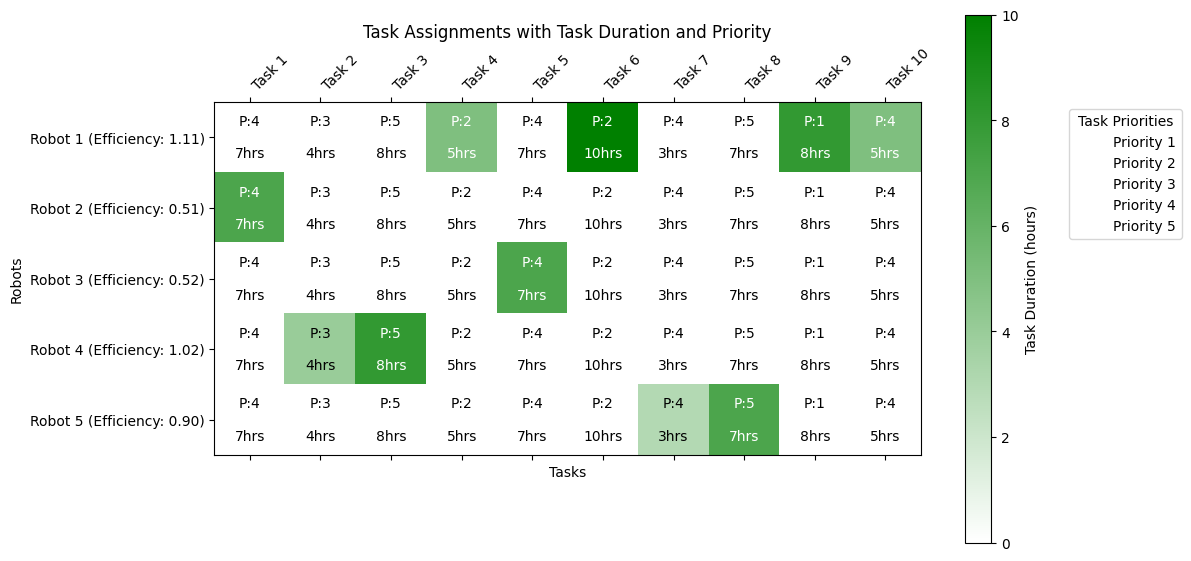

In [ ]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
